In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
#Basic Data Exploration
df=pd.read_csv('/content/bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [ ]:
#As ["contact_telephone"]  is a categorical variable. it  can be converted into indicator variable using pd.get_dummies()
dummy=pd.get_dummies(df['contact'],prefix="contact_telephone")
# turns the column comment_disabled into a dummy
dummy

,contact_telephone_cellular,contact_telephone_telephone
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
41183,1,0
41184,1,0
41185,1,0
41186,1,0


In [ ]:
#merging the dummy variables/DataFrame into our original dataframe 'df'
df=df.merge(dummy,left_index=True,right_index=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_cellular,contact_telephone_telephone
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0


In [ ]:
dummy=pd.get_dummies(df['loan'],prefix="loan_details")
# turns the column comment_disabled into a dummy
dummy

,loan_details_no,loan_details_unknown,loan_details_yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
41183,1,0,0
41184,1,0,0
41185,1,0,0
41186,1,0,0


In [ ]:
df=df.merge(dummy,left_index=True,right_index=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_cellular,contact_telephone_telephone,loan_details_no,loan_details_unknown,loan_details_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,1,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,1,0,1,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,1,0,1,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,1,0,1,0,0


In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['marital']= label_encoder.fit_transform(df['marital'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_cellular,contact_telephone_telephone,loan_details_no,loan_details_unknown,loan_details_yes
0,56,housemaid,1,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
1,57,services,1,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
2,37,services,1,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
3,40,admin.,1,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
4,56,services,1,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,0,0,1


In [ ]:
df['default']= label_encoder.fit_transform(df['default'])
df['default'].unique()

array([0, 1, 2])

In [ ]:
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['job']=label_encoder.fit_transform(df['job'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_cellular,contact_telephone_telephone,loan_details_no,loan_details_unknown,loan_details_yes
0,56,3,1,basic.4y,0,0,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
1,57,7,1,high.school,1,0,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
2,37,7,1,high.school,0,2,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
3,40,0,1,basic.6y,0,0,0,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
4,56,7,1,high.school,0,0,2,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,0,0,1


In [ ]:
#dropping irrelavent features
df.drop(columns=['contact_telephone_cellular','loan_details_no','loan_details_yes','loan_details_unknown','contact'],inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_telephone
0,56,3,1,basic.4y,0,0,0,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,7,1,high.school,1,0,0,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,7,1,high.school,0,2,0,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,0,1,basic.6y,0,0,0,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,7,1,high.school,0,0,2,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [ ]:
df['education']=label_encoder.fit_transform(df['education'])

In [ ]:
df['y']= label_encoder.fit_transform(df['y'])

### Visualization

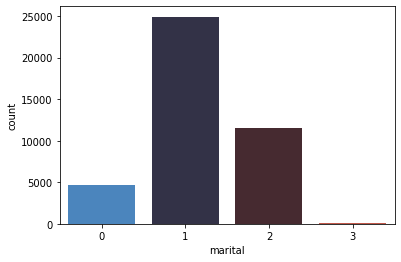

In [ ]:
sns.countplot(x="marital",data=df,palette="icefire")

From the above countplot, it is evident that married has more count

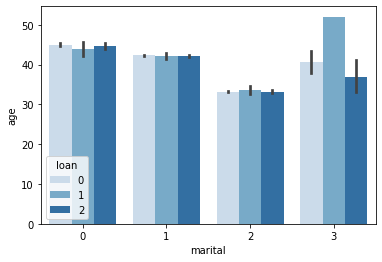

In [ ]:
sns.barplot(x='marital',y='age',hue='loan',data=df,palette='Blues')

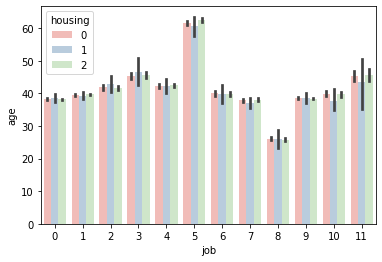

In [ ]:
sns.barplot(x='job',y='age',hue='housing',data=df,palette='Pastel1')

In [ ]:
df.dtypes

age                              int64
job                              int64
marital                          int64
education                        int64
default                          int64
housing                          int64
loan                             int64
month                           object
day_of_week                     object
duration                         int64
campaign                         int64
pdays                            int64
previous                         int64
poutcome                        object
emp.var.rate                   float64
cons.price.idx                 float64
cons.conf.idx                  float64
euribor3m                      float64
nr.employed                    float64
y                                int64
contact_telephone_telephone      uint8
dtype: object

###Building the model

In [ ]:
df.corr()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_telephone
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399,0.007021
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.006490,-0.006923,-0.028468,0.020965,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122,-0.025132
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,0.010290,-0.007240,-0.037942,0.038689,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203,-0.054501
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.015102,0.000371,-0.046626,0.038831,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799,-0.105726
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,-0.011794,0.032825,0.080062,-0.102416,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352,0.135238
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.007658,-0.011010,-0.010551,0.021314,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552,-0.082186
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.000916,0.005166,0.000345,-0.001327,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909,-0.008556
duration,-0.000866,-0.006490,0.010290,-0.015102,-0.011794,-0.007658,-0.000916,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274,-0.026657
campaign,0.004594,-0.006923,-0.007240,0.000371,0.032825,-0.011010,0.005166,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357,0.077368
pdays,-0.034369,-0.028468,-0.037942,-0.046626,0.080062,-0.010551,0.000345,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914,0.117970


In [ ]:
df.dtypes

age                              int64
job                              int64
marital                          int64
education                        int64
default                          int64
housing                          int64
loan                             int64
month                           object
day_of_week                     object
duration                         int64
campaign                         int64
pdays                            int64
previous                         int64
poutcome                        object
emp.var.rate                   float64
cons.price.idx                 float64
cons.conf.idx                  float64
euribor3m                      float64
nr.employed                    float64
y                                int64
contact_telephone_telephone      uint8
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#defining X and y
X =df.drop(labels=["pdays",'previous','campaign','poutcome','month','day_of_week','cons.conf.idx','cons.price.idx','y','nr.employed','contact_telephone_telephone'], axis = 1)
y =df["y"]

In [ ]:
clf=svm.SVC()

In [ ]:
#performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=1)


In [ ]:
clf.fit(X_train,y_train)


SVC()

In [ ]:
#predicting
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8883495145631068

In [ ]:
#Building the model with defining the values of hyper parameters
clf=svm.SVC(gamma=0.25,C=2)

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=1)

In [ ]:
clf.fit(X_train,y_train)

SVC(C=2, gamma=0.25)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8754045307443366